In [1]:
import pandas as pd
from rpy2.robjects import r
import rpy2.robjects.pandas2ri as pandas2ri

In [2]:
file = './Rdata/PIK_Obs-EWEMBI_1_2_3_4_5_6_7_8_9_10_11_12_uas_vas_ps_tas_pr_rsds_rlds_hurs_cc.rda'

import os
import pandas as pd
 
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
 
pandas2ri.activate()
 
base = importr('base')
base.load(file);
rdf = base.mget(base.ls())
 
df = {}
for i,f in enumerate(base.names(rdf)):
    display(i,f)

0

'data'

In [3]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

readRDS = robjects.r['readRDS']
df = readRDS('ewembi.rds')
df = pandas2ri.ri2py(df)

'[1] "uas"'

'[1] "vas"'

'[1] "ps"'

'[1] "tas"'

'[1] "pr"'

'[1] "rsds"'

'[1] "rlds"'

'[1] "hurs"'

'[1] "cc"'

,"[1] ""uas""","[1] ""vas""","[1] ""ps""","[1] ""tas""","[1] ""pr""","[1] ""rsds""","[1] ""rlds""","[1] ""hurs""","[1] ""cc"""
1979-01-01,0.744084,-3.996653,1009.974795,-16.969759,0.000000,14.629337,215.075568,67.537271,0.0
1979-01-02,-0.141185,-4.090610,1008.375702,-10.263456,0.000000,13.558045,230.457873,78.161667,0.0
1979-01-03,-0.380941,-3.621848,1010.465078,-10.997426,0.000000,16.257024,216.210594,86.593764,0.0
1979-01-04,-0.741716,-3.233857,1012.603084,-15.647929,0.000000,15.957238,214.126480,86.597272,0.0
1979-01-05,-0.526692,-1.174161,1015.512853,-14.913034,0.000000,12.424308,235.181467,88.228968,0.0
...,...,...,...,...,...,...,...,...,...
2016-12-27,4.390244,-4.664558,1008.977716,2.853336,0.000000,14.245173,237.370497,45.539025,0.0
2016-12-28,1.736124,0.206734,1025.036251,-0.514165,0.000000,13.277690,241.509000,81.421535,0.0
2016-12-29,3.462033,2.485823,1019.178243,1.483366,0.000000,11.554545,257.444644,89.094142,0.0
2016-12-30,4.999370,4.102583,1010.271148,6.165467,0.000000,7.776685,291.818421,83.554774,0.0


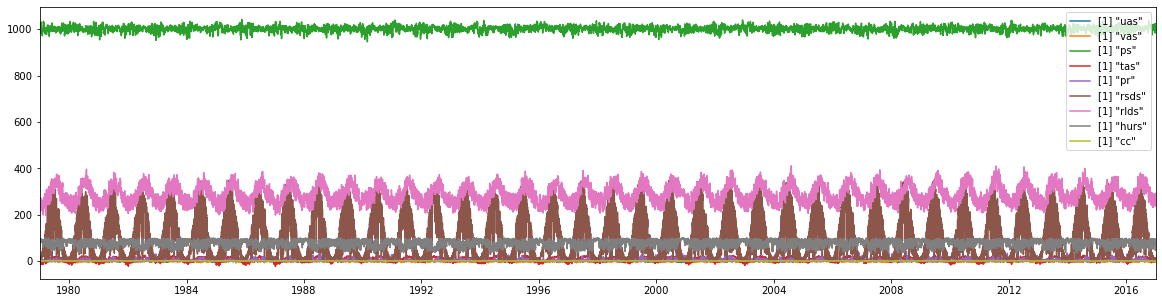

In [5]:
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt

dates = df[0][3][1]
dates = ','.join(dates).split(',')
dates  = [datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S GMT').date() for date in dates]
allData = pd.DataFrame(index=dates)
for i in df:
    name = str(i[0][0]).strip()
    display(name)
    values = [float(i) for i in i[1]]
    allData[name] = values
    
display(allData)

allData.plot(figsize=[20,5])
plt.savefig('ewembi.png')

allData.to_csv('ewembi.csv')